In [1]:
from tensorflow.keras.layers import Dense,Flatten,Input                         # TO BUILT LAYERS FOR OUR NEURAL NETWORK
from tensorflow.keras.models import Model,load_model                            # TO CREATE AND LOAD MODEL
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img    # DATA AUGMENTATION AND LOAD IMAGES
import matplotlib.pyplot as plt                                                 # TO PLOT GRAPHS
from glob import glob                                                           # TO RETRIEVE THE FOLDERS 
from tensorflow.keras.applications import VGG16                                 # OUR TRANSFER LERANING TECHNIQUE

In [2]:
IMAGE_SIZE=[224,224]                                   # DEFAULT IMAGE SIZE FOR ALL TRANSFER LEARNING TECHNIQUES


# DATA PATHS IN GOOGLE COLAB
train_path='/content/drive/MyDrive/dataset/train'      
val_path='/content/drive/MyDrive/dataset/valid'       
test_path='/content/drive/MyDrive/dataset/test'


In [3]:
folders=glob('/content/drive/MyDrive/dataset/train/*')
folders                                                      # WE GET FILE NAMES IN THE FOLDER

['/content/drive/MyDrive/dataset/train/without_mask',
 '/content/drive/MyDrive/dataset/train/with_mask']

In [4]:
vgg16=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)   # INITIALIZING VGG16 TO DOWNLOAD PRETRAINED WEIGHTS

58892288/58889256 [==============================] - 1s 0us/step


In [5]:
for layer in vgg16.layers:
  layer.trainable=False                             # TELLING OUT MODEL THAT WE NEED PRETRAINED LAYERS

In [6]:
vgg16.summary()                                     # METADATA OF THE MODEL

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [27]:
x=Flatten()(vgg16.output)                                       #  FLATTENING THE BOTTLENECK LAYER SO THAT WE CAN IMPLEMENT THE CLASSIFIER ON OUR OWN

In [28]:
prediction=Dense(len(folders),activation='softmax')(x)          # OUTPUT LAYER 

model=Model(inputs=vgg16.input,outputs=prediction)              # CONNECTING OUR LAYERS TO VGGNET

In [29]:
model.summary()                                                 # FINAL SUMMARY OF OUR MODEL

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])   # COMPILING OUR MODEL BY TELLING OUR REQUIREMENTS

In [15]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,                              # DATA AUGMENTATION 
                                 zoom_range=0.2,
                                 horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1./255)

In [33]:
train_set=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=100,class_mode='categorical')  # STORE OUR DATA FOR TRAINING
val_set=val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=100,class_mode='categorical')        # FOR VALIDATING OUR MODEL

Found 3649 images belonging to 2 classes.
Found 806 images belonging to 2 classes.


In [19]:
# THIS BLOCK IS MANDATORY SO THAT OUR SYSTEM KNOWS HOW MUCH GPU IT MUST BE USED. 0.5 IS RECOMMENDED
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


In [22]:
from tensorflow.keras.applications.vgg16 import preprocess_input        # WHEN WE INPUT IMAGE IT WILL BE USEFUL, NOW NO USE

In [37]:
# FITTING OUR MODEL
r=model.fit_generator(train_set,validation_data=val_set,epochs=10,steps_per_epoch=len(train_set),validation_steps=len(val_set))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
 9/37 [======>.......................] - ETA: 42s - loss: 0.0713 - accuracy: 0.9800

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


37/37 [==============================] - 62s 2s/step - loss: 0.0596 - accuracy: 0.9833 - val_loss: 0.0471 - val_accuracy: 0.9839
Epoch 2/10
37/37 [==============================] - 61s 2s/step - loss: 0.0509 - accuracy: 0.9871 - val_loss: 0.0449 - val_accuracy: 0.9851
Epoch 3/10
37/37 [==============================] - 60s 2s/step - loss: 0.0408 - accuracy: 0.9901 - val_loss: 0.0342 - val_accuracy: 0.9876
Epoch 4/10
37/37 [==============================] - 58s 2s/step - loss: 0.0336 - accuracy: 0.9912 - val_loss: 0.0283 - val_accuracy: 0.9913
Epoch 5/10
37/37 [==============================] - 57s 2s/step - loss: 0.0351 - accuracy: 0.9904 - val_loss: 0.0319 - val_accuracy: 0.9888
Epoch 6/10
37/37 [==============================] - 57s 2s/step - loss: 0.0294 - accuracy: 0.9910 - val_loss: 0.0300 - val_accuracy: 0.9901
Epoch 7/10
37/37 [==============================] - 61s 2s/step - loss: 0.0200 - accuracy: 0.9967 - val_loss: 0.0260 - val_accuracy: 0.9913
Epoch 8/10
37/37 [=============

In [38]:
model.save('/content/drive/MyDrive/model_vgg16.h5')      # SAVING OUR TRAINED MODEL

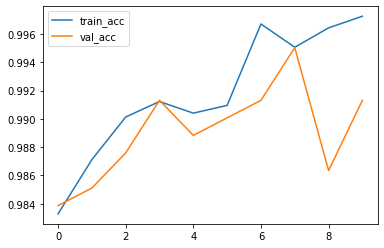

In [41]:
# PLOTTING OUR TRAINING AND VALIDATION ACCURACY 
plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

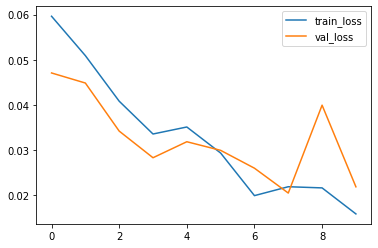

In [42]:
# PLOTTING OUR TRAINING AND VALIDATION LOSS
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()